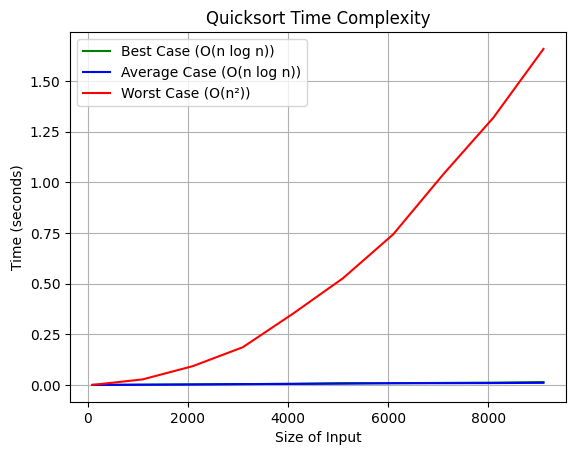

In [2]:
import random
import time
import matplotlib.pyplot as plt

# Función de Quicksort con pivote aleatorio (mejor caso O(n log n))
def quicksort_mejor(arr):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort_mejor(left) + middle + quicksort_mejor(right)

# Función de Quicksort normal (caso promedio O(n log n))
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

# Función de Quicksort iterativo para el peor caso (O(n²))
def quicksort_peor(arr):
    stack = [(0, len(arr) - 1)]
    while stack:
        low, high = stack.pop()
        if low < high:
            pivot = low  # Siempre el primer elemento como pivote
            i = low + 1
            for j in range(low + 1, high + 1):
                if arr[j] < arr[pivot]:
                    arr[i], arr[j] = arr[j], arr[i]
                    i += 1
            arr[pivot], arr[i - 1] = arr[i - 1], arr[pivot]
            stack.append((low, i - 2))
            stack.append((i, high))
    return arr

# Medir tiempos de ejecución
def measure_execution_time(func, arr):
    start_time = time.time()
    func(arr.copy())  # Copia para evitar modificar el original
    return time.time() - start_time

# Generar datos de prueba
def generate_data(size):
    return [random.randint(1, 10000) for _ in range(size)]

# Graficar resultados
def plot_results():
    sizes = list(range(100, 10001, 1000))  # De 100 a 10,000 con saltos de 1000
    times_best = []
    times_avg = []
    times_worst = []

    for size in sizes:
        best_case = list(range(size))  # Lista ordenada para el mejor caso
        avg_case = generate_data(size)  # Lista aleatoria para el caso promedio
        worst_case = list(range(size, 0, -1))  # Lista en orden inverso para el peor caso

        times_best.append(measure_execution_time(quicksort_mejor, best_case))
        times_avg.append(measure_execution_time(quicksort, avg_case))
        times_worst.append(measure_execution_time(quicksort_peor, worst_case))

    plt.plot(sizes, times_best, label='Best Case (O(n log n))', color='green')
    plt.plot(sizes, times_avg, label='Average Case (O(n log n))', color='blue')
    plt.plot(sizes, times_worst, label='Worst Case (O(n²))', color='red')
    plt.xlabel('Size of Input')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.title('Quicksort Time Complexity')
    plt.grid(True)
    plt.show()

# Ejecutar y graficar
plot_results()
